In [8]:
import numpy as np
import pickle
import os

In [4]:
data_dir='/scratch/gpfs/jabbate/'

with open(os.path.join(data_dir,'train.pkl'), 'rb') as f:
    data=pickle.load(f)

In [70]:
quartiles={}
for sig in ['thomson_temp_EFITRT1','thomson_dens_EFITRT1','ffprime_EFITRT1']:
    quartiles[sig]={}
    data_concat=[]
    for shot in data.keys():
        try:
            data_concat.extend(data[shot][sig])
        except:
            pass
    data_concat=np.array(data_concat)
    #data_concat=np.concatenate([data[shot][sig] for shot in data.keys()])
    quartiles[sig]['lower'] = np.nanpercentile(data_concat, 25, axis=0)
    quartiles[sig]['upper'] = np.nanpercentile(data_concat, 75, axis=0)

In [104]:
for shot in data.keys():
    print(shot)
    print(data[shot]['t_ip_flat'])
    print('\n')
shot=list(data.keys())[0]
data[shot]['t_ip_flat']+data[shot]['ip_flat_duration']

156336
1058.0


156338
1077.0


156339
1120.0


156340
1116.0


156341
1081.5


156342
805.5


156350
1064.5


156351
None


156352
None


156353
600.5


156354
556.0


156355
764.5


156356
782.0


156357
764.0


156358
1102.5


156359
1074.0


156360
1112.0


156361
1079.5


156362
1068.0


156363
1092.5


156364
1062.5


156365
1063.5


156366
1097.5


156367
1086.5


156368
1068.5


156369
1065.0


156370
1070.0


156371
772.5


156372
777.5


156373
878.0


156374
767.0


156375
756.5


156376
819.0


156381
1092.0


156382
1075.0


156383
1073.5


156385
1126.5


156386
1454.5


156387
1325.0


156388
1380.5


156394
None


156395
None


156396
None


156397
212.0


156398
356.0


156400
None


156401
None


156402
None


156403
None


156406
862.0




4274.5

In [36]:
plt.rcParams['figure.figsize'] = [20, 20]

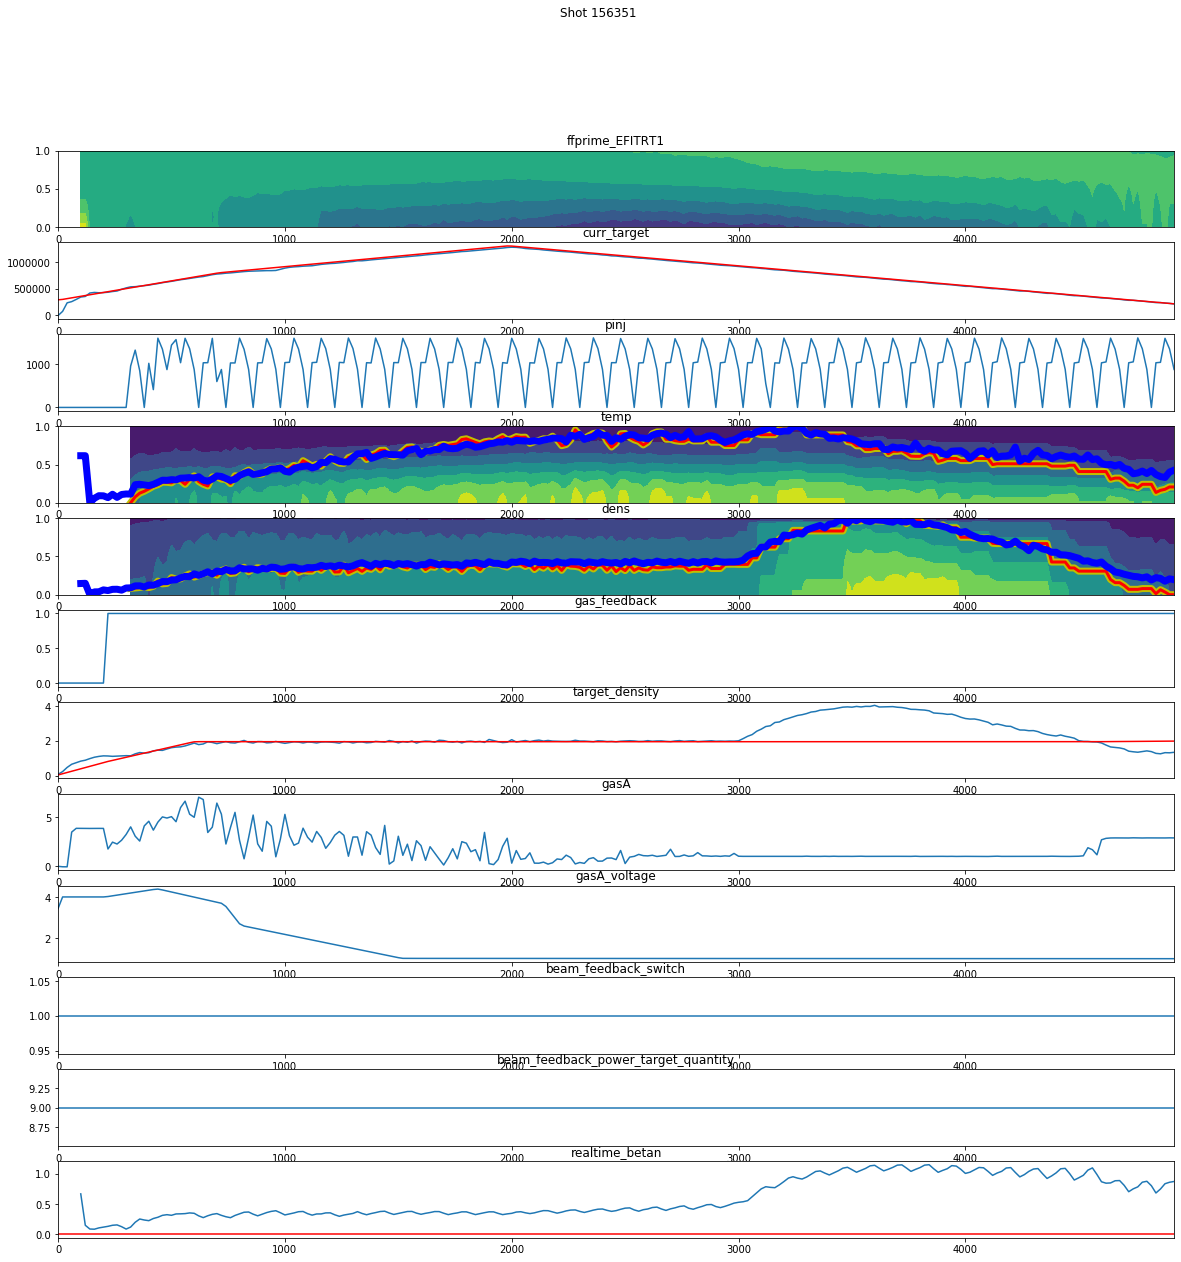

In [106]:
import numpy as np
import matplotlib.pyplot as plt

shots=list(data.keys())
shot=156351 #np.random.choice(shots)
sigs=['ffprime_EFITRT1','curr_target','pinj','temp','dens','gas_feedback','target_density','gasA','gasA_voltage', 'beam_feedback_switch', 'beam_feedback_power_target_quantity', 'realtime_betan']
#sigs=['curr_target','pinj','temp','dens','target_source_pinj_30L','beam_feedback_switch','beam_feedback_switch','beam_feedback_power_target_quantity','beam_feedback_power_target_value','realtime_betan']
assert(all(data[shot]['gas_density_or_profile_algorithm']==0))

def removeOutliers(x, outlierConstant, sig):
    #upper_quartile = np.nanpercentile(x, 75)
    #lower_quartile = np.nanpercentile(x, 25)
    upper_quartile=quartiles[sig]['upper']
    lower_quartile=quartiles[sig]['lower']
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    return np.clip(x,lower_quartile - IQR,upper_quartile + IQR)


def my_normalize(arr):
    return (arr-np.nanmin(arr))/(np.nanmax(arr)-np.nanmin(arr))

fig=plt.figure()
for i,sig in enumerate(sigs):
    ax=fig.add_subplot(len(sigs),1.5,i+1)
    #ax.axvline(data[shot]['t_ip_flat'],c='r')
    ax.axvline(data[shot]['t_ip_flat']+data[shot]['ip_flat_duration'],c='r')
    if sig in ['temp','dens']: #len(data[shot][sig].shape)>1:
        thomson_sig_name='thomson_{}_EFITRT1'.format(sig)
        thomson_sig=data[shot][thomson_sig_name]
        thomson_sig=removeOutliers(thomson_sig,1.5,thomson_sig_name)
        
        ax.contourf(data[shot]['time'],
                    np.linspace(0,1,65),
                    #thomson_sig.T)
                    data[shot][sig].T)
            
        zipfit_sig=my_normalize(np.mean(data[shot][sig],axis=1))
        ax.plot(data[shot]['time'],zipfit_sig,c='y',linewidth=7)
        ax.plot(data[shot]['time'],zipfit_sig,c='r',linewidth=3)
        
        thomson_sig=my_normalize(np.mean(thomson_sig,axis=1))
        ax.plot(data[shot]['time'],thomson_sig,c='b',linewidth=7)
        #ax.plot(data[shot]['time'],my_normalize(np.mean(data[shot]['thomson_{}_EFITRT1'.format(sig)],axis=1), clip=True, sig=sig),c='g',linewidth=3)
    elif len(data[shot][sig].shape)>1:
        thomson_sig=removeOutliers(data[shot][sig],1.5,sig)
        
        ax.contourf(data[shot]['time'],
                    np.linspace(0,1,65),
                    #thomson_sig.T)
                    data[shot][sig].T)
            
#         zipfit_sig=my_normalize(np.mean(data[shot][sig],axis=1))
#         ax.plot(data[shot]['time'],zipfit_sig,c='y',linewidth=7)
#         ax.plot(data[shot]['time'],zipfit_sig,c='r',linewidth=3)
        
       
    elif sig=='target_density':
        ax.plot(data[shot]['time'],data[shot]['density_estimate'])
        ax.plot(data[shot]['time'],data[shot]['target_density'],c='r')
    elif sig=='realtime_betan':
        ax.plot(data[shot]['time'],data[shot]['realtime_betan'])
        ax.plot(data[shot]['time'],data[shot]['beam_feedback_power_target_value'],c='r')
    elif sig=='curr_target':
        ax.plot(data[shot]['time'],data[shot]['curr'])
        ax.plot(data[shot]['time'],data[shot]['curr_target'],c='r')
        
    else:
        ax.plot(data[shot]['time'],data[shot][sig])
    ax.set_title(sig)
    ax.set_xlim(min(data[shot]['time']),max(data[shot]['time']))
#plt.subplots_adjust(hspace=.5)
fig.suptitle('Shot {}'.format(shot))
plt.show()

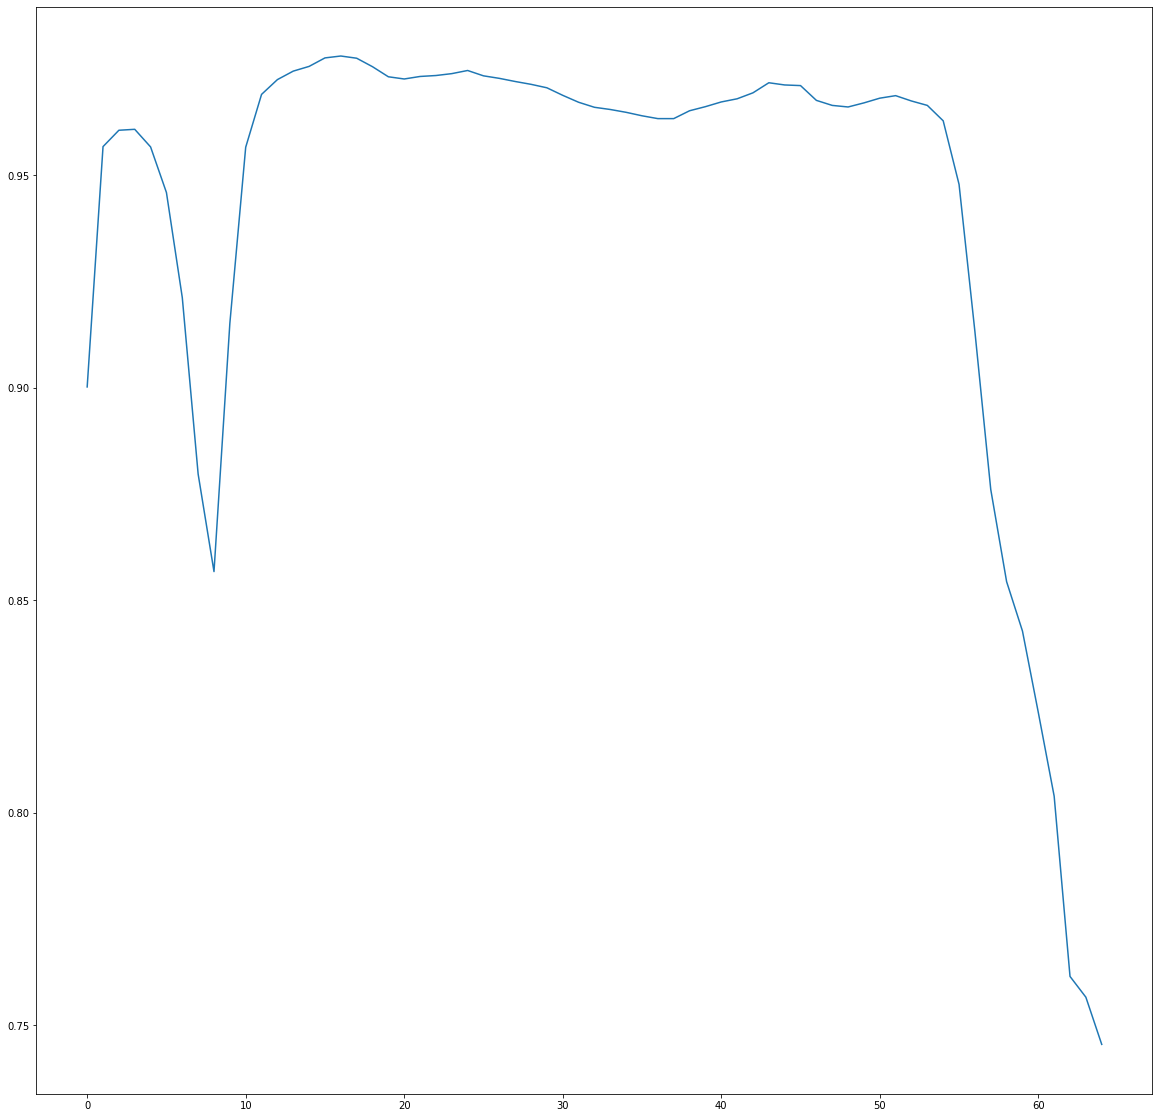

In [146]:
sig='thomson_temp_EFITRT1'
concat_data=np.concatenate([data[shot][sig] for shot in data.keys()])

lower_quartile=np.nanpercentile(concat_data,25,axis=0)
upper_quartile=np.nanpercentile(concat_data,75,axis=0)
IQR=(upper_quartile-lower_quartile)*.5

total_lower_quartile=np.nanpercentile(concat_data,25)
total_upper_quartile=np.nanpercentile(concat_data,75)
total_IQR=(total_upper_quartile-total_lower_quartile)*1.5

percentage_here=[]
for which_psi in range(0,65):
    lower_requirement=concat_data[:,which_psi]>=lower_quartile[which_psi] - IQR[which_psi] 
    upper_requirement=concat_data[:,which_psi]<=upper_quartile[which_psi] + IQR[which_psi] 
    #lower_requirement=concat_data[:,which_psi]>=total_lower_quartile - total_IQR
    #upper_requirement=concat_data[:,which_psi]<=total_upper_quartile + total_IQR
    percentage_here.append(sum(np.logical_and(lower_requirement, upper_requirement))/len(concat_data[:,which_psi]))
plt.plot(percentage_here)
plt.show()

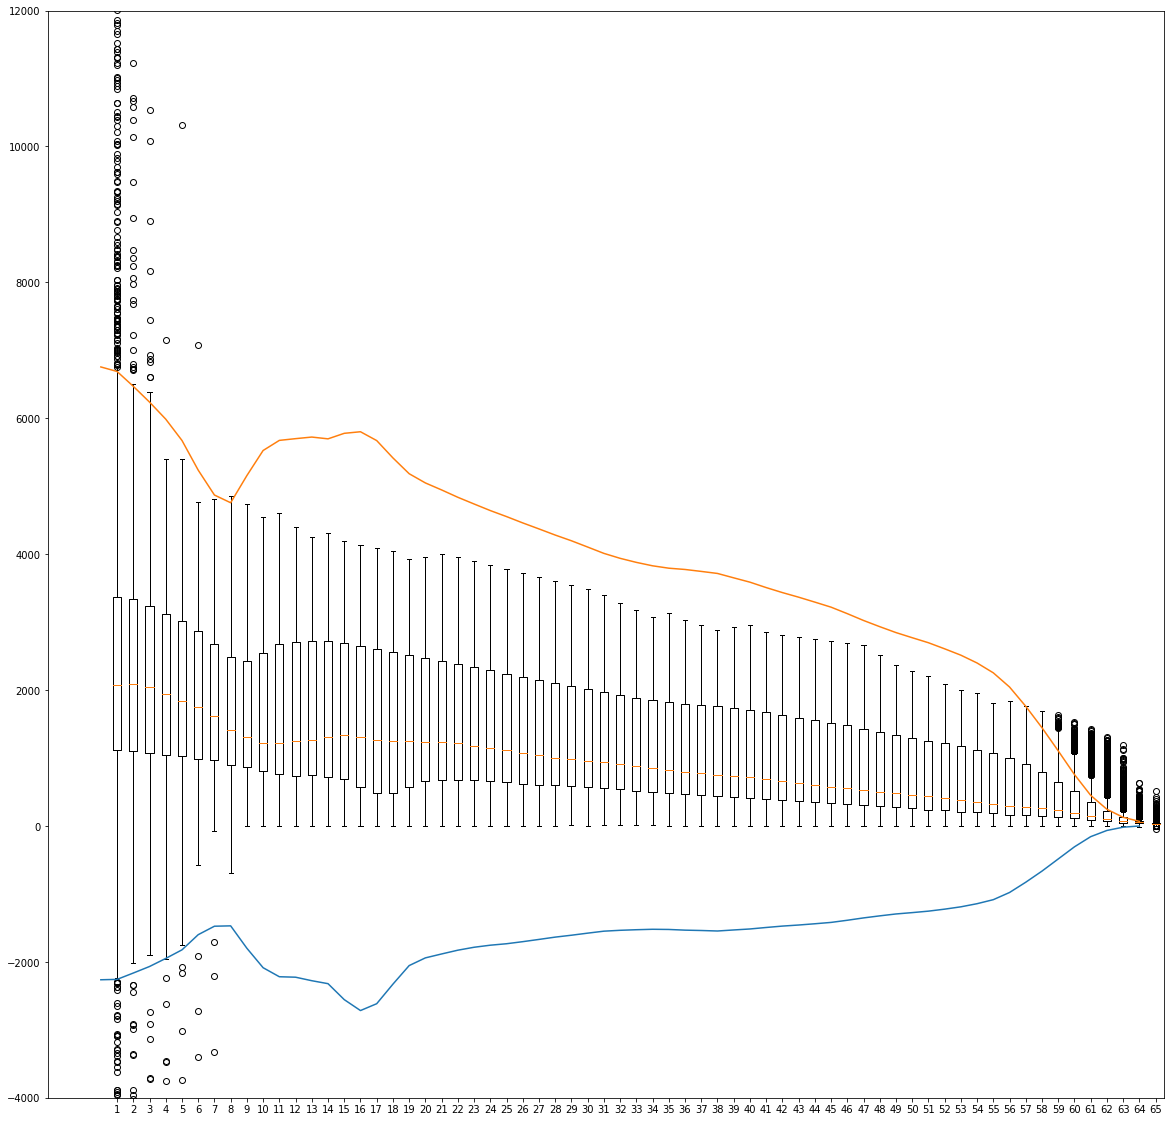

In [171]:
lower_quartile=np.nanpercentile(concat_data,25,axis=0)
upper_quartile=np.nanpercentile(concat_data,75,axis=0)
IQR=(upper_quartile-lower_quartile)*1.5

total_lower_quartile=np.nanpercentile(concat_data,25)
total_upper_quartile=np.nanpercentile(concat_data,75)
total_IQR=(total_upper_quartile-total_lower_quartile)*1.5

plt.boxplot([concat_data[~np.isnan(concat_data[:,which_psi])][:,which_psi] for which_psi in range(65)])
plt.ylim(-4000,12000)

plt.plot(lower_quartile-IQR)
plt.plot(upper_quartile+IQR)

# plt.axhline(total_lower_quartile-total_IQR)
# plt.axhline(total_upper_quartile+total_IQR)

plt.show()

## Gas feedback analysis

In [190]:
arr=[]
for shot in data.keys():
    this_entry=data[shot]
    if any(this_entry['gas_feedback']==1):
        arr.append(shot)

In [191]:
print(len(arr))
print(len(data.keys()))

50
50


In [36]:
a=np.array([[1,500,3],[200,1,1],[2,2,3],[1,2,3],[1,2,2],[1,1,1]])
# print(a)
# upper_quartiles = np.nanpercentile(a, 75, axis=0)
# lower_quartiles = np.nanpercentile(a, 75, axis=0)
# print(lower_quartiles)
# print(upper_quartiles)
print(a)
print(np.clip(a,[1,2,3],[2,3,4]))

[[  1 500   3]
 [200   1   1]
 [  2   2   3]
 [  1   2   3]
 [  1   2   2]
 [  1   1   1]]
[[1 3 3]
 [2 2 3]
 [2 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


## Beam feedback analysis

In [192]:
arr=[]

beams=['15L','15R','21L','21R','30L','30R','33L','33R']
for shot in data.keys():
    this_entry=data[shot]
    if all([any(this_entry['target_source_pinj_{}'.format(beam)]==0) for beam in beams]):
        arr.append(shot)

In [193]:
print(len(arr))
print(len(data.keys()))

50
50
